<a href="https://colab.research.google.com/github/DmitriyKalganov/mygit/blob/main/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D0%B1%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=10,n_features=3,n_targets=1)

In [ ]:
X

array([[ 0.23694912, -0.52329604,  1.03749862],
       [-0.19667147,  0.26157695,  0.15717948],
       [ 0.12204794,  0.89907792,  0.27555647],
       [-0.61077272,  0.60663037, -1.14388183],
       [ 0.10745174, -1.06101929, -0.885243  ],
       [-0.38509672, -1.14802546, -0.82466939],
       [ 1.02418178, -0.34117884, -0.6333059 ],
       [-0.62874152,  0.28046422,  1.35422365],
       [ 0.49861155,  0.84446669, -0.59393801],
       [-0.26727182, -0.10750454, -0.34951977]])

In [ ]:
y

array([  49.39541536,   29.61027611,   85.51835048,  -54.68453099,
       -144.70447494, -149.04433004,  -68.34554116,  125.18908175,
         13.66585366,  -37.55259658])

In [ ]:
df=pd.DataFrame(X)

In [ ]:
df['y_true']=y

In [ ]:
df['y_pred_0'] = df['y_true'].mean()

In [ ]:
df

,0,1,2,y_true,y_pred_0
0,0.236949,-0.523296,1.037499,49.395415,-15.09525
1,-0.196671,0.261577,0.157179,29.610276,-15.09525
2,0.122048,0.899078,0.275556,85.518350,-15.09525
3,-0.610773,0.606630,-1.143882,-54.684531,-15.09525
4,0.107452,-1.061019,-0.885243,-144.704475,-15.09525
5,-0.385097,-1.148025,-0.824669,-149.044330,-15.09525
6,1.024182,-0.341179,-0.633306,-68.345541,-15.09525
7,-0.628742,0.280464,1.354224,125.189082,-15.09525
8,0.498612,0.844467,-0.593938,13.665854,-15.09525
9,-0.267272,-0.107505,-0.349520,-37.552597,-15.09525


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

моя модель ошибается на 75 в среднем 


In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_0'])

75.77104510610793

In [ ]:
df['residiual_0'] = df['y_true']-df['y_pred_0']

расчет разницы

In [ ]:
df

,0,1,2,y_true,y_pred_0,residiual_0
0,0.236949,-0.523296,1.037499,49.395415,-15.09525,64.490665
1,-0.196671,0.261577,0.157179,29.610276,-15.09525,44.705526
2,0.122048,0.899078,0.275556,85.518350,-15.09525,100.613600
3,-0.610773,0.606630,-1.143882,-54.684531,-15.09525,-39.589281
4,0.107452,-1.061019,-0.885243,-144.704475,-15.09525,-129.609225
5,-0.385097,-1.148025,-0.824669,-149.044330,-15.09525,-133.949080
6,1.024182,-0.341179,-0.633306,-68.345541,-15.09525,-53.250292
7,-0.628742,0.280464,1.354224,125.189082,-15.09525,140.284331
8,0.498612,0.844467,-0.593938,13.665854,-15.09525,28.761103
9,-0.267272,-0.107505,-0.349520,-37.552597,-15.09525,-22.457347


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_1 = DecisionTreeRegressor(max_depth=1)

In [ ]:
tree_1.fit(df[[0,1,2]],df['residiual_0'])

DecisionTreeRegressor(max_depth=1)

In [ ]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [ ]:
df

,0,1,2,y_true,y_pred_0,residiual_0,tree_pred_1
0,0.236949,-0.523296,1.037499,49.395415,-15.09525,64.490665,59.399646
1,-0.196671,0.261577,0.157179,29.610276,-15.09525,44.705526,59.399646
2,0.122048,0.899078,0.275556,85.518350,-15.09525,100.613600,59.399646
3,-0.610773,0.606630,-1.143882,-54.684531,-15.09525,-39.589281,-89.099470
4,0.107452,-1.061019,-0.885243,-144.704475,-15.09525,-129.609225,-89.099470
5,-0.385097,-1.148025,-0.824669,-149.044330,-15.09525,-133.949080,-89.099470
6,1.024182,-0.341179,-0.633306,-68.345541,-15.09525,-53.250292,-89.099470
7,-0.628742,0.280464,1.354224,125.189082,-15.09525,140.284331,59.399646
8,0.498612,0.844467,-0.593938,13.665854,-15.09525,28.761103,59.399646
9,-0.267272,-0.107505,-0.349520,-37.552597,-15.09525,-22.457347,59.399646


In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[2] <= -0.614\nsquared_error = 7643.577\nsamples = 10\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 1847.238\nsamples = 4\nvalue = -89.099'),
 Text(0.75, 0.25, 'squared_error = 2687.008\nsamples = 6\nvalue = 59.4')]

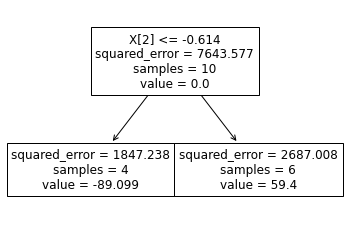

In [ ]:
plot_tree(tree_1)

In [ ]:
df['y_pred_1'] = df['y_pred_0']+0.1*df['tree_pred_1']

In [ ]:
df


,0,1,2,y_true,y_pred_0,residiual_0,tree_pred_1,y_pred_1
0,0.236949,-0.523296,1.037499,49.395415,-15.09525,64.490665,59.399646,-9.155285
1,-0.196671,0.261577,0.157179,29.610276,-15.09525,44.705526,59.399646,-9.155285
2,0.122048,0.899078,0.275556,85.518350,-15.09525,100.613600,59.399646,-9.155285
3,-0.610773,0.606630,-1.143882,-54.684531,-15.09525,-39.589281,-89.099470,-24.005197
4,0.107452,-1.061019,-0.885243,-144.704475,-15.09525,-129.609225,-89.099470,-24.005197
5,-0.385097,-1.148025,-0.824669,-149.044330,-15.09525,-133.949080,-89.099470,-24.005197
6,1.024182,-0.341179,-0.633306,-68.345541,-15.09525,-53.250292,-89.099470,-24.005197
7,-0.628742,0.280464,1.354224,125.189082,-15.09525,140.284331,59.399646,-9.155285
8,0.498612,0.844467,-0.593938,13.665854,-15.09525,28.761103,59.399646,-9.155285
9,-0.267272,-0.107505,-0.349520,-37.552597,-15.09525,-22.457347,59.399646,-9.155285


In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_0'])

75.77104510610793

In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_1'])

69.831080462925

In [ ]:
df['residiual_1'] = df['y_true'] - df['y_pred_1']

In [ ]:
df

,0,1,2,y_true,y_pred_0,residiual_0,tree_pred_1,y_pred_1,residiual_1
0,0.236949,-0.523296,1.037499,49.395415,-15.09525,64.490665,59.399646,-9.155285,58.550700
1,-0.196671,0.261577,0.157179,29.610276,-15.09525,44.705526,59.399646,-9.155285,38.765561
2,0.122048,0.899078,0.275556,85.518350,-15.09525,100.613600,59.399646,-9.155285,94.673635
3,-0.610773,0.606630,-1.143882,-54.684531,-15.09525,-39.589281,-89.099470,-24.005197,-30.679334
4,0.107452,-1.061019,-0.885243,-144.704475,-15.09525,-129.609225,-89.099470,-24.005197,-120.699278
5,-0.385097,-1.148025,-0.824669,-149.044330,-15.09525,-133.949080,-89.099470,-24.005197,-125.039133
6,1.024182,-0.341179,-0.633306,-68.345541,-15.09525,-53.250292,-89.099470,-24.005197,-44.340345
7,-0.628742,0.280464,1.354224,125.189082,-15.09525,140.284331,59.399646,-9.155285,134.344367
8,0.498612,0.844467,-0.593938,13.665854,-15.09525,28.761103,59.399646,-9.155285,22.821139
9,-0.267272,-0.107505,-0.349520,-37.552597,-15.09525,-22.457347,59.399646,-9.155285,-28.397312


In [ ]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [ ]:
tree_2.fit(df[[0,1,2]],df['residiual_1'])

DecisionTreeRegressor(max_depth=1)

In [ ]:
df['y_pred_2'] = df['y_pred_1']+0.1*tree_2.predict(df[[0,1,2]])

In [ ]:
df

,0,1,2,y_true,y_pred_0,residiual_0,tree_pred_1,y_pred_1,residiual_1,y_pred_2
0,0.236949,-0.523296,1.037499,49.395415,-15.09525,64.490665,59.399646,-9.155285,58.550700,-0.996928
1,-0.196671,0.261577,0.157179,29.610276,-15.09525,44.705526,59.399646,-9.155285,38.765561,-0.996928
2,0.122048,0.899078,0.275556,85.518350,-15.09525,100.613600,59.399646,-9.155285,94.673635,-0.996928
3,-0.610773,0.606630,-1.143882,-54.684531,-15.09525,-39.589281,-89.099470,-24.005197,-30.679334,-29.444101
4,0.107452,-1.061019,-0.885243,-144.704475,-15.09525,-129.609225,-89.099470,-24.005197,-120.699278,-29.444101
5,-0.385097,-1.148025,-0.824669,-149.044330,-15.09525,-133.949080,-89.099470,-24.005197,-125.039133,-29.444101
6,1.024182,-0.341179,-0.633306,-68.345541,-15.09525,-53.250292,-89.099470,-24.005197,-44.340345,-29.444101
7,-0.628742,0.280464,1.354224,125.189082,-15.09525,140.284331,59.399646,-9.155285,134.344367,-0.996928
8,0.498612,0.844467,-0.593938,13.665854,-15.09525,28.761103,59.399646,-9.155285,22.821139,-14.594189
9,-0.267272,-0.107505,-0.349520,-37.552597,-15.09525,-22.457347,59.399646,-9.155285,-28.397312,-14.594189


In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_1'])

69.831080462925

In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_2'])

64.39217606850383

теперь все удаляем чтобы сделать все через цикл

In [ ]:
df = df[[0,1,2,'y_true']].copy()

In [ ]:
df

,0,1,2,y_true
0,0.236949,-0.523296,1.037499,49.395415
1,-0.196671,0.261577,0.157179,29.610276
2,0.122048,0.899078,0.275556,85.518350
3,-0.610773,0.606630,-1.143882,-54.684531
4,0.107452,-1.061019,-0.885243,-144.704475
5,-0.385097,-1.148025,-0.824669,-149.044330
6,1.024182,-0.341179,-0.633306,-68.345541
7,-0.628742,0.280464,1.354224,125.189082
8,0.498612,0.844467,-0.593938,13.665854
9,-0.267272,-0.107505,-0.349520,-37.552597


деревьев 10 лёрнинг рейт 0.1 это то число на которое умнажали выше 

In [ ]:
n = 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

In [ ]:
for i in range(n):
  df['residiual'] = df['y_true']-df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0,1,2]],df['residiual'])
  df['y_pred'] = df['y_pred']+nu*tree.predict(df[[0,1,2]])
  trees.append(tree)
  print(mean_absolute_error(df['y_true'],df['y_pred']))


69.831080462925
64.39217606850383
59.40880151593393
54.8460125311262
52.21120126402028
48.28034526216705
46.00728652181805
43.218736569382926
39.97663280208859
38.122172575858905


In [ ]:
test=df[[0,1,2]].copy()

In [ ]:
test['y_pred'] = df['y_true'].mean()

In [ ]:
trees

[DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1)]

In [ ]:
for tree in trees :
  test['y_pred']+= nu*tree.predict(df[[0,1,2]])

In [ ]:
test

,0,1,2,y_pred
0,0.236949,-0.523296,1.037499,33.237964
1,-0.196671,0.261577,0.157179,23.942798
2,0.122048,0.899078,0.275556,33.237964
3,-0.610773,0.606630,-1.143882,-46.302183
4,0.107452,-1.061019,-0.885243,-80.113834
5,-0.385097,-1.148025,-0.824669,-80.113834
6,1.024182,-0.341179,-0.633306,-46.302183
7,-0.628742,0.280464,1.354224,33.237964
8,0.498612,0.844467,-0.593938,-10.888576
9,-0.267272,-0.107505,-0.349520,-10.888576


In [ ]:
df

,0,1,2,y_true,y_pred,residiual
0,0.236949,-0.523296,1.037499,49.395415,33.237964,18.011911
1,-0.196671,0.261577,0.157179,29.610276,23.942798,7.521939
2,0.122048,0.899078,0.275556,85.518350,33.237964,54.134847
3,-0.610773,0.606630,-1.143882,-54.684531,-46.302183,-6.527888
4,0.107452,-1.061019,-0.885243,-144.704475,-80.113834,-72.008481
5,-0.385097,-1.148025,-0.824669,-149.044330,-80.113834,-76.348337
6,1.024182,-0.341179,-0.633306,-68.345541,-46.302183,-20.188898
7,-0.628742,0.280464,1.354224,125.189082,33.237964,93.805578
8,0.498612,0.844467,-0.593938,13.665854,-10.888576,26.408890
9,-0.267272,-0.107505,-0.349520,-37.552597,-10.888576,-24.809561


Выше и есть градиентный бустинг

In [ ]:
from sympy import *

In [ ]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')


In [ ]:
1/2*(y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [ ]:
0.5*(y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [ ]:
diff(1/2*(y_true-y_pred)**2,y_pred)

1.0*y_pred - 1.0*y_true

In [ ]:
-(y_true - y_pred)

y_pred - y_true

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10,n_features=3,n_redundant=0)

In [ ]:
df = pd.DataFrame(X)

In [ ]:
df['y_true'] = y

In [ ]:
df

,0,1,2,y_true
0,0.424122,-0.003981,1.737055,1
1,-0.309128,-0.965856,-0.226131,0
2,-1.023643,-1.020288,1.768859,0
3,-0.303915,0.862752,-0.244764,1
4,-0.130486,0.908077,-0.486820,1
5,2.030539,1.160524,-0.375697,1
6,-2.149856,-1.304034,-0.586077,0
7,0.692556,-0.998435,0.601814,0
8,0.441129,-1.522718,0.420847,0
9,0.150758,0.432121,0.926487,1


In [ ]:
df['y_pred'] = df['y_true'].mean()

In [ ]:
df

,0,1,2,y_true,y_pred
0,0.424122,-0.003981,1.737055,1,0.5
1,-0.309128,-0.965856,-0.226131,0,0.5
2,-1.023643,-1.020288,1.768859,0,0.5
3,-0.303915,0.862752,-0.244764,1,0.5
4,-0.130486,0.908077,-0.486820,1,0.5
5,2.030539,1.160524,-0.375697,1,0.5
6,-2.149856,-1.304034,-0.586077,0,0.5
7,0.692556,-0.998435,0.601814,0,0.5
8,0.441129,-1.522718,0.420847,0,0.5
9,0.150758,0.432121,0.926487,1,0.5


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(df['y_true'],df['y_pred'])

0.5

In [ ]:
n= 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()
for i in range(n):
  df['residiual'] = df['y_true']-df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0,1,2]],df['residiual'])
  df['y_pred'] = df['y_pred']+nu*tree.predict(df[[0,1,2]])
  trees.append(tree)
  print(roc_auc_score(df['y_true'],df['y_pred']))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
df

,0,1,2,y_true,y_pred,residiual
0,0.424122,-0.003981,1.737055,1,0.825661,0.19371
1,-0.309128,-0.965856,-0.226131,0,0.174339,-0.19371
2,-1.023643,-1.020288,1.768859,0,0.174339,-0.19371
3,-0.303915,0.862752,-0.244764,1,0.825661,0.19371
4,-0.130486,0.908077,-0.486820,1,0.825661,0.19371
5,2.030539,1.160524,-0.375697,1,0.825661,0.19371
6,-2.149856,-1.304034,-0.586077,0,0.174339,-0.19371
7,0.692556,-0.998435,0.601814,0,0.174339,-0.19371
8,0.441129,-1.522718,0.420847,0,0.174339,-0.19371
9,0.150758,0.432121,0.926487,1,0.825661,0.19371
